In [1]:
import keras
fmnist = keras.datasets.fashion_mnist
(training_images,training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Label:0
Image:[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17 

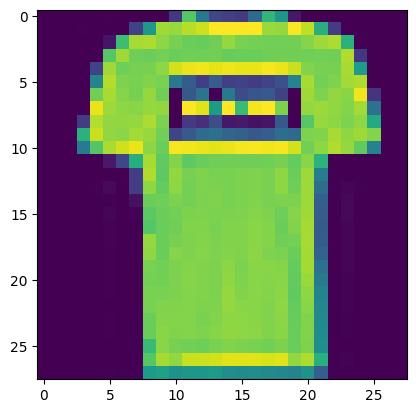

In [2]:
import numpy as np
import matplotlib.pyplot as plt

index = 1

np.set_printoptions(linewidth=320)
print(f"Label:{training_labels[index]}")
print(f"Image:{training_images[index]}")

plt.imshow(training_images[index])

In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
history = model.fit(training_images, training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.0599 - accuracy: 0.6802
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6271 - accuracy: 0.7740
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5548 - accuracy: 0.8026
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5141 - accuracy: 0.8189
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4878 - accuracy: 0.8291
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4693 - accuracy: 0.8353
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4551 - accuracy: 0.8414
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4435 - accuracy: 0.8444
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4342 - accuracy: 0.8476
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0

<Axes: >

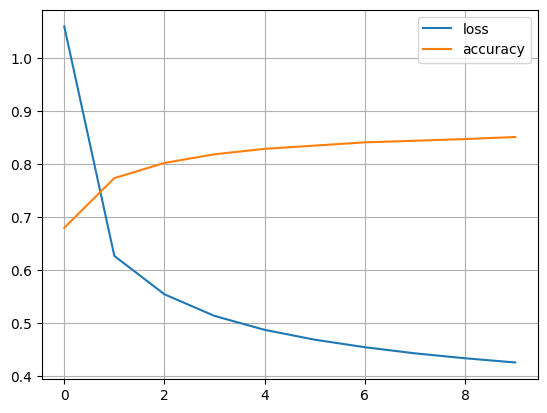

In [8]:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [9]:
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1875/1875 [==============================] - 8s 4ms/step - loss: 0.4207 - accuracy: 0.8524
Pérdida en el conjunto de entrenamiento: 0.420718789100647
Precisión en el conjunto de entrenamiento: 0.8524166941642761
313/313 [==============================] - 1s 4ms/step - loss: 0.4557 - accuracy: 0.8362
Pérdida en el conjunto de prueba: 0.45567962527275085
Precisión en el conjunto de prueba: 0.8361999988555908


In [11]:
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index: index+1])
print(f"Clasification:\n {classification.reshape(-1,1)}")

Label: 2
1/1 [==============================] - 0s 21ms/step
Clasification:
 [[3.65615211e-04]
 [1.10592127e-05]
 [9.43408132e-01]
 [1.02626735e-04]
 [1.23758540e-02]
 [3.18562954e-10]
 [4.36850488e-02]
 [3.00807700e-15]
 [5.16197615e-05]
 [1.93659281e-12]]
